In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.read_csv(r"/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/online_shoppers_intention.csv")
df.sample(10)

df.info()

df.isnull().sum()

df.describe()

df.shape

df.corr()

sns.countplot(x='Revenue',data=df)

fal_count=df.groupby('Revenue')['Administrative'].count()[0]
tru_count=df.groupby('Revenue')['Administrative'].count()[1]
per=(tru_count/fal_count)*100
per

sns.pairplot(df.loc[:,['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Revenue']],hue='Revenue',kind='reg')

sns.pairplot(df.loc[:,['Administrative','Informational','ProductRelated']],kind='reg')

plt.figure(figsize=(15,5))
sns.countplot(x='Administrative',data=df)
plt.xlabel('Administrative Page Count')

plt.figure(figsize=(20,5))
sns.scatterplot(x='Administrative',y='Administrative_Duration',hue='Revenue',data=df)
plt.xlabel('Administrative Page Count')

plt.figure(figsize=(20,5))
sns.boxplot(x='Administrative',y='Administrative_Duration',hue='Revenue',data=df)
plt.ylim(0,2000)

plt.figure(figsize=(15,5))
sns.countplot(x='Informational',data=df)
plt.xlabel('Informational Page Count')

plt.figure(figsize=(20,5))
sns.scatterplot(x='Informational',y='Informational_Duration',data=df)
plt.xlabel('Informational Page Count')

plt.figure(figsize=(20,5))
sns.boxplot(x='Informational',y='Informational_Duration',hue='Revenue',data=df)
plt.ylim(0,2000)

plt.figure(figsize=(20,7))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',data=df)
plt.xlabel('ProductRelated Page Count')

plt.figure(figsize=(20,15))
sns.boxplot(y='ProductRelated',data=df)

sns.barplot(y='PageValues',x='Revenue', data=df)

adm=np.mean((df['Administrative']/df['Administrative_Duration']).replace(np.inf,np.nan).dropna())
inm=np.mean((df['Informational']/df['Informational_Duration']).replace(np.inf,np.nan).dropna())
prm=np.mean((df['ProductRelated']/df['ProductRelated_Duration']).replace(np.inf,np.nan).dropna())
pagm=pd.Series([adm,inm,prm],index=['Administrative','Informational','ProductRelated'])
plt.plot(pagm.index,pagm.values,'-^g')
plt.xlabel('Type of Page')
plt.ylabel('Mean Time Spent')

br=df.groupby('Revenue')['OperatingSystems'].value_counts()
br

brt=pd.DataFrame(br[True])
plt.figure(figsize=(15,4))
sns.barplot(x=brt.index,y='OperatingSystems',data=brt)
plt.ylabel('Count of OperatingSystem where Revenue Is Earned')

nn=df.groupby('Revenue')['Browser'].value_counts()
nn

tr=pd.DataFrame(nn[True])
plt.figure(figsize=(15,4))
sns.barplot(x=tr.index,y='Browser',data=tr)
plt.ylabel('Count of Browser where Revenue Is Earned')

sr=df.groupby('Revenue')['Region'].value_counts()
sr

srf=pd.DataFrame(sr[False])
srt=pd.DataFrame(sr[True])
plt.figure(figsize=(15,4))
sns.barplot(x=srt.index,y='Region',data=srt)
plt.ylabel('Count of Region where Revenue Is Earned')

srp=srt/srf
plt.plot(srp['Region'].sort_values(ascending=True))

tf=df.groupby('Revenue')['TrafficType'].value_counts()
tf

tf1=pd.DataFrame(tf[True])
tf2=pd.DataFrame(tf[False])
plt.figure(figsize=(15,4))
sns.barplot(x=tf1.index,y='TrafficType',data=tf1)
plt.ylabel('Count of TrafficType where Revenue Is Earned')

tff=tf2[tf2>50]
tft=tf1[tf1>50]
tfp=tft/tff
plt.plot(tfp['TrafficType'].sort_values(ascending=True))
plt.xticks(range(11))
plt.show()



In [1]:
# 📦 Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 📁 Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/online_shoppers_intention.csv")

In [ ]:
# 🔍 View random 10 rows
print(df.sample(10))

       Administrative  Administrative_Duration  Informational  \
7820                4                71.400000              0   
11570               0                 0.000000              0   
5119                0                 0.000000              0   
5798                0                 0.000000              0   
8188                6                72.019608              4   
11688               0                 0.000000              0   
9899                0                 0.000000              0   
254                 0                 0.000000              0   
12286               0                 0.000000              0   
6295                2                61.480000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
7820                      0.0              14               449.400000   
11570                     0.0               7               182.500000   
5119                      0.0               4                9

In [4]:
# 📊 Basic dataset info
df.info()              # Columns, types, null values
print(df.isnull().sum())  # Check missing values
print(df.describe())      # Summary stats
print(df.shape)           # Shape of the dataset (rows, columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# 🔗 Correlation matrix
print(df.corr(numeric_only=True))

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

/tmp/ipython-input-2374641957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette={'True': 'green', 'False': 'red'})


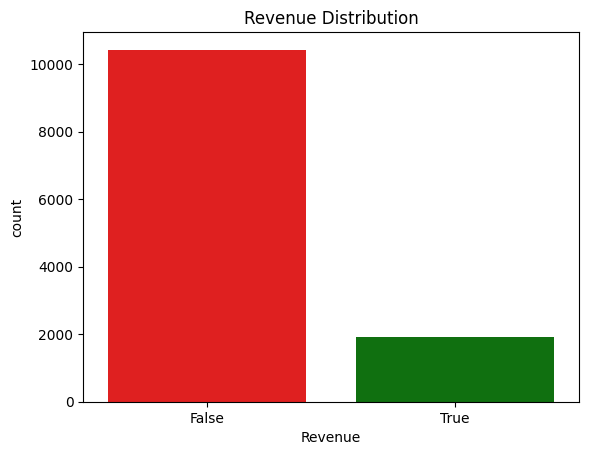

In [10]:
# 1️⃣ Class Balance - Revenue Distribution (string values)
sns.countplot(x='Revenue', data=df, palette={'True': 'green', 'False': 'red'})
plt.title("Revenue Distribution")
plt.show()

In [11]:
# 📈 Percentage of Revenue True vs False
false_count = df[df['Revenue'] == False].shape[0]
true_count = df[df['Revenue'] == True].shape[0]
percentage = (true_count / false_count) * 100
print("Percentage of Revenue=True over False:", percentage)

Percentage of Revenue=True over False: 18.307426597582037


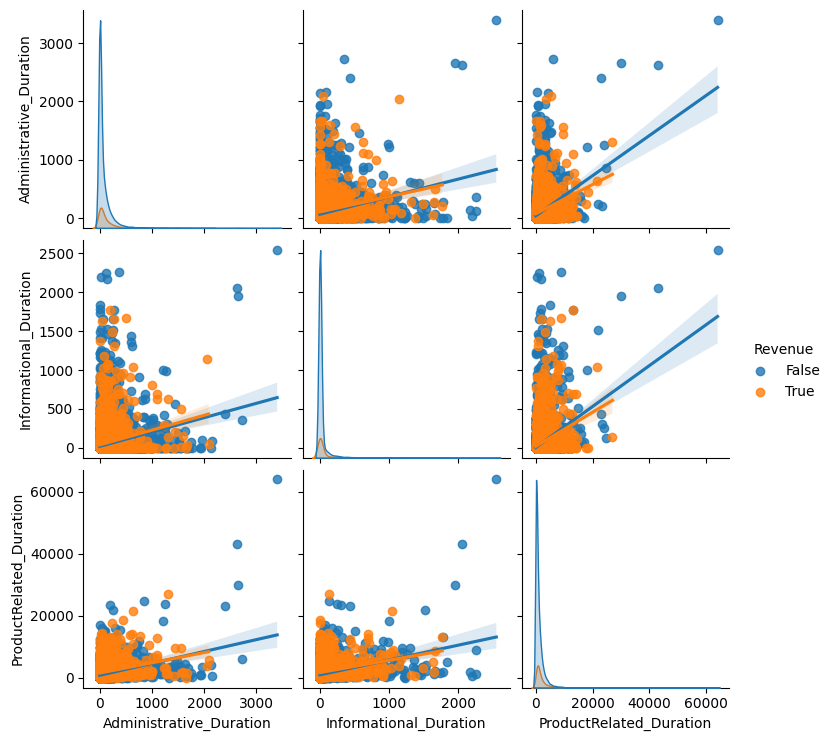

In [12]:
# 2️⃣ Pair Plots to visualize relationships
# Duration features vs Revenue
sns.pairplot(df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Revenue']], hue='Revenue', kind='reg')
plt.show()

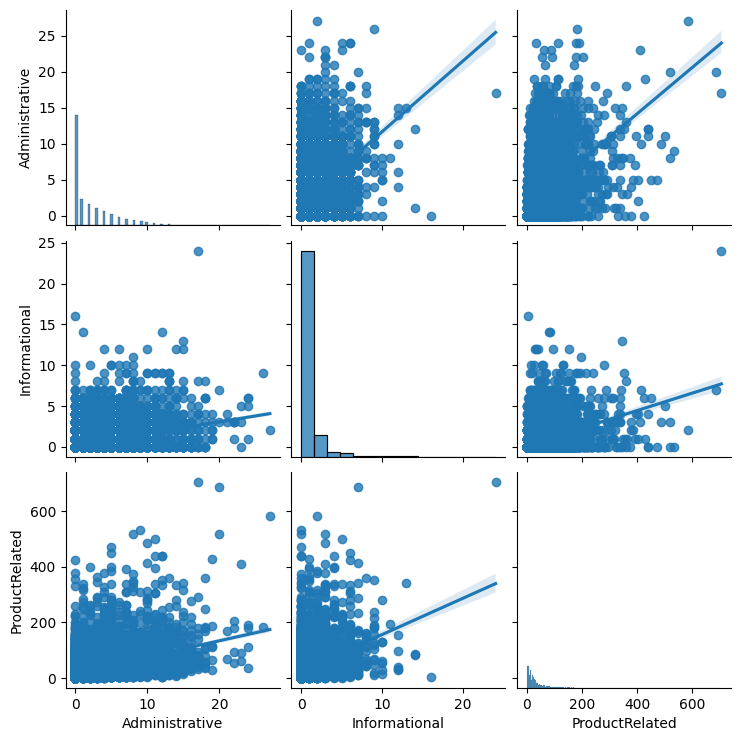

In [13]:
# Count features only
sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated']], kind='reg')
plt.show()

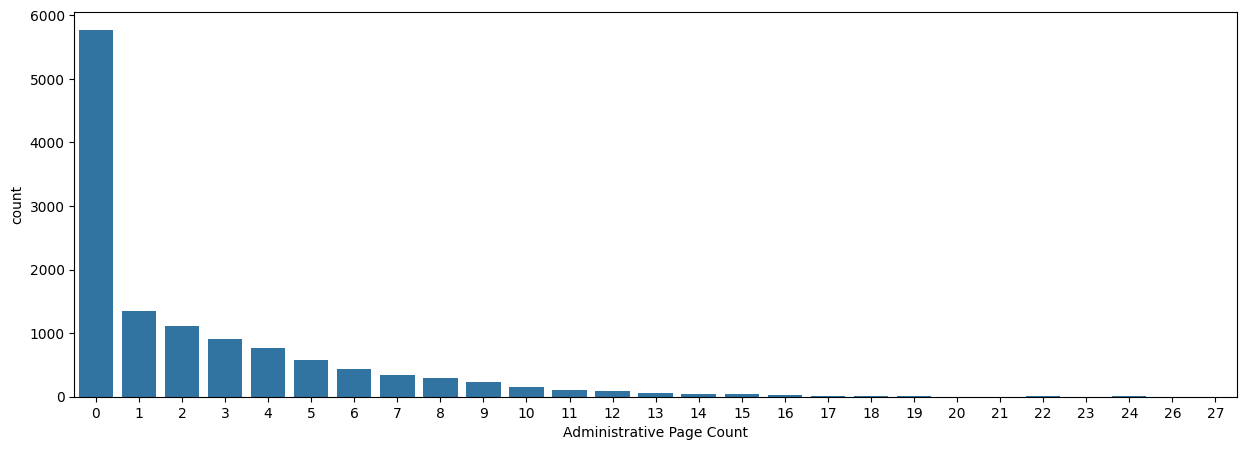

In [14]:
# 3️⃣ Analysis: Administrative Pages
plt.figure(figsize=(15, 5))
sns.countplot(x='Administrative', data=df)
plt.xlabel('Administrative Page Count')
plt.show()

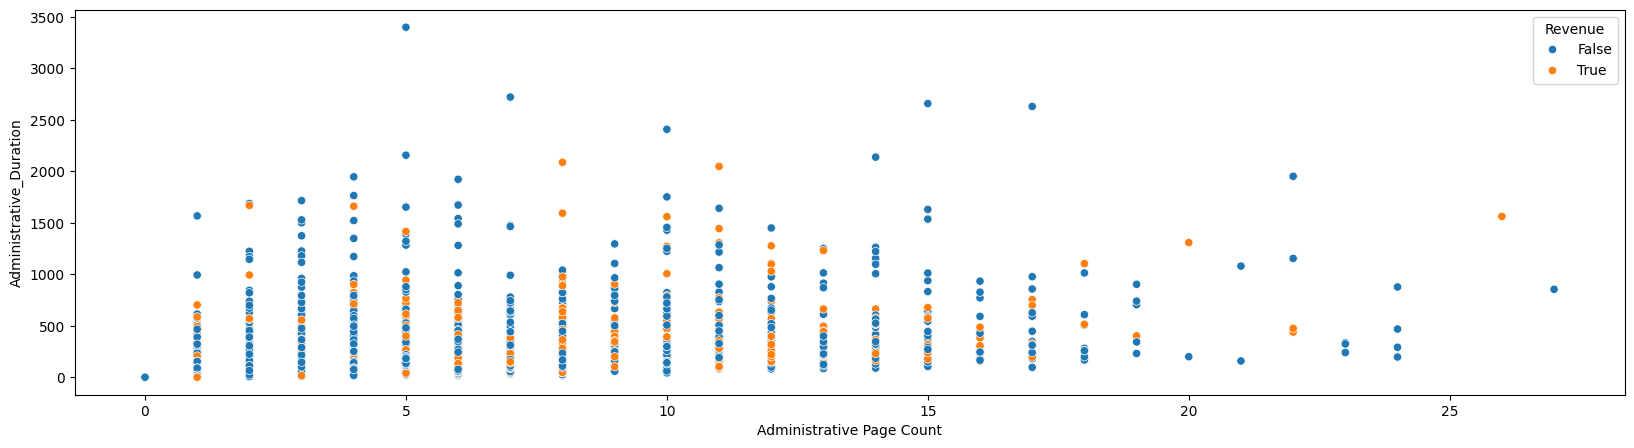

In [15]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=df)
plt.xlabel('Administrative Page Count')
plt.show()

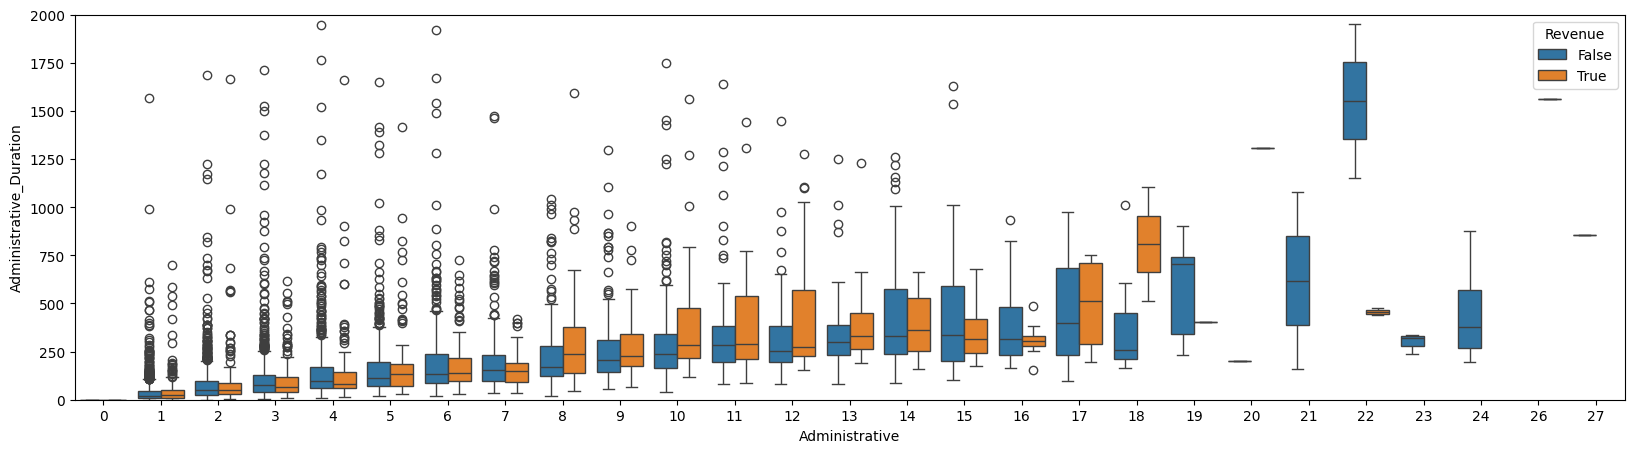

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=df)
plt.ylim(0, 2000)
plt.show()

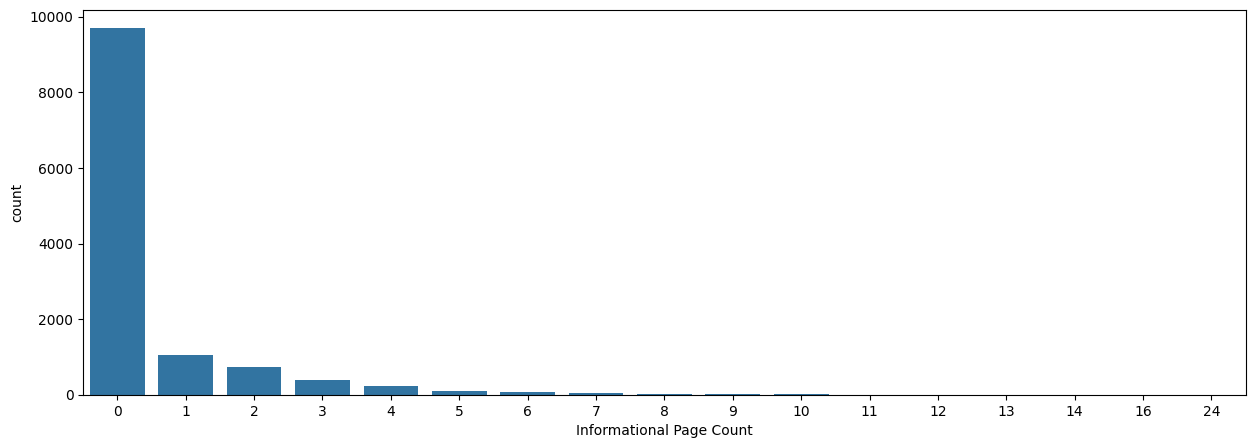

In [16]:
# 4️⃣ Informational Pages
plt.figure(figsize=(15, 5))
sns.countplot(x='Informational', data=df)
plt.xlabel('Informational Page Count')
plt.show()

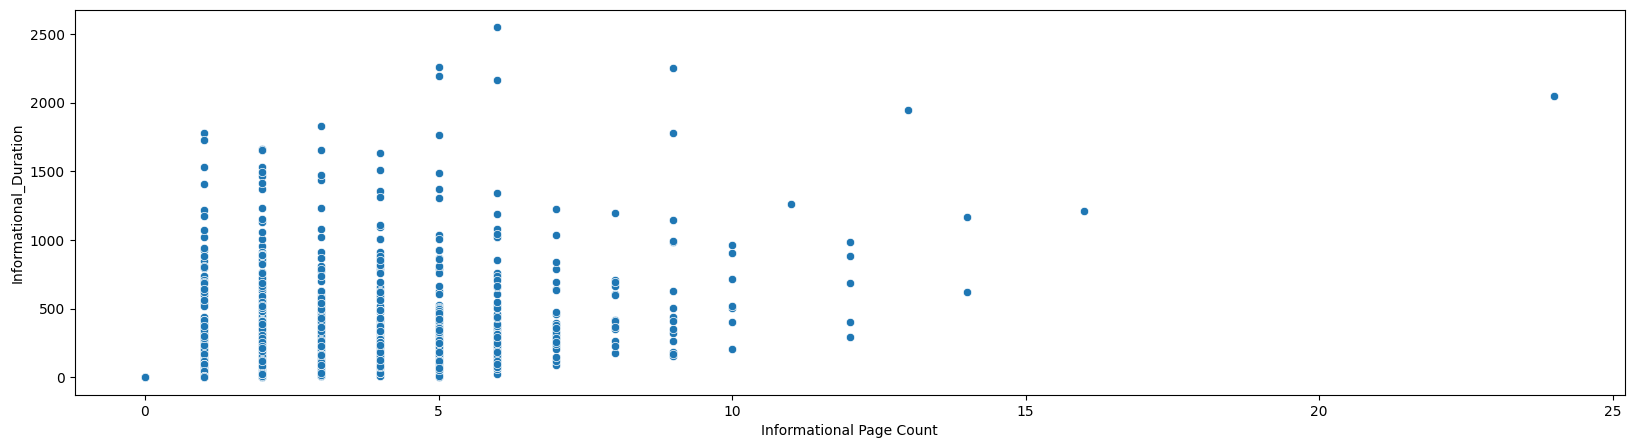

In [17]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Informational', y='Informational_Duration', data=df)
plt.xlabel('Informational Page Count')
plt.show()

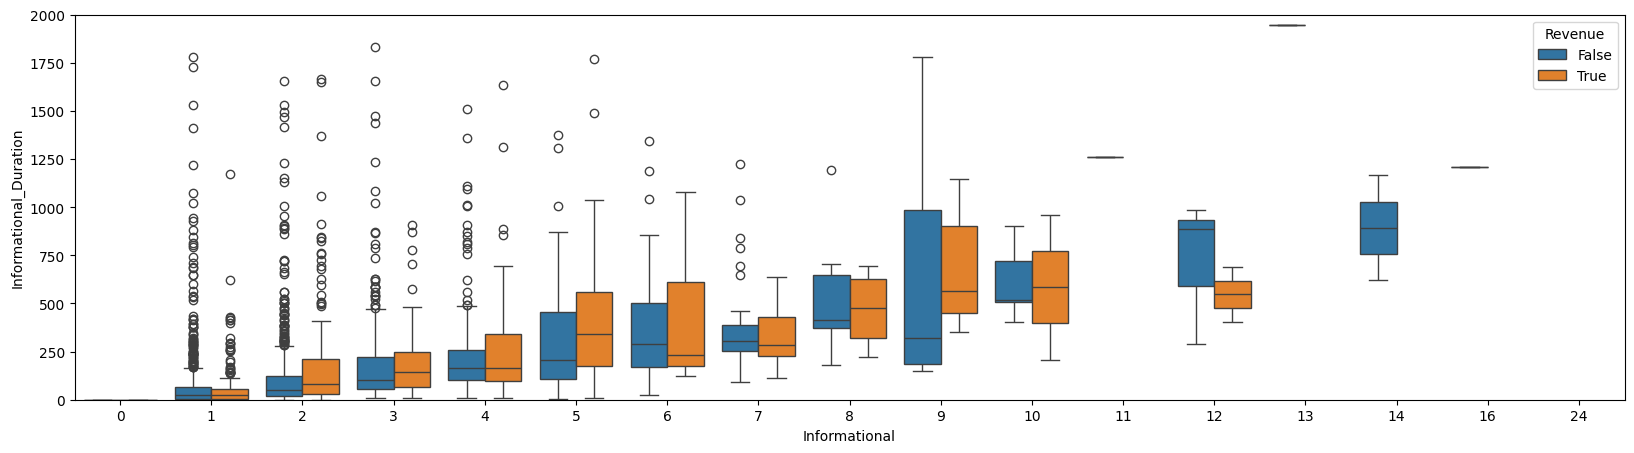

In [18]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Informational', y='Informational_Duration', hue='Revenue', data=df)
plt.ylim(0, 2000)
plt.show()

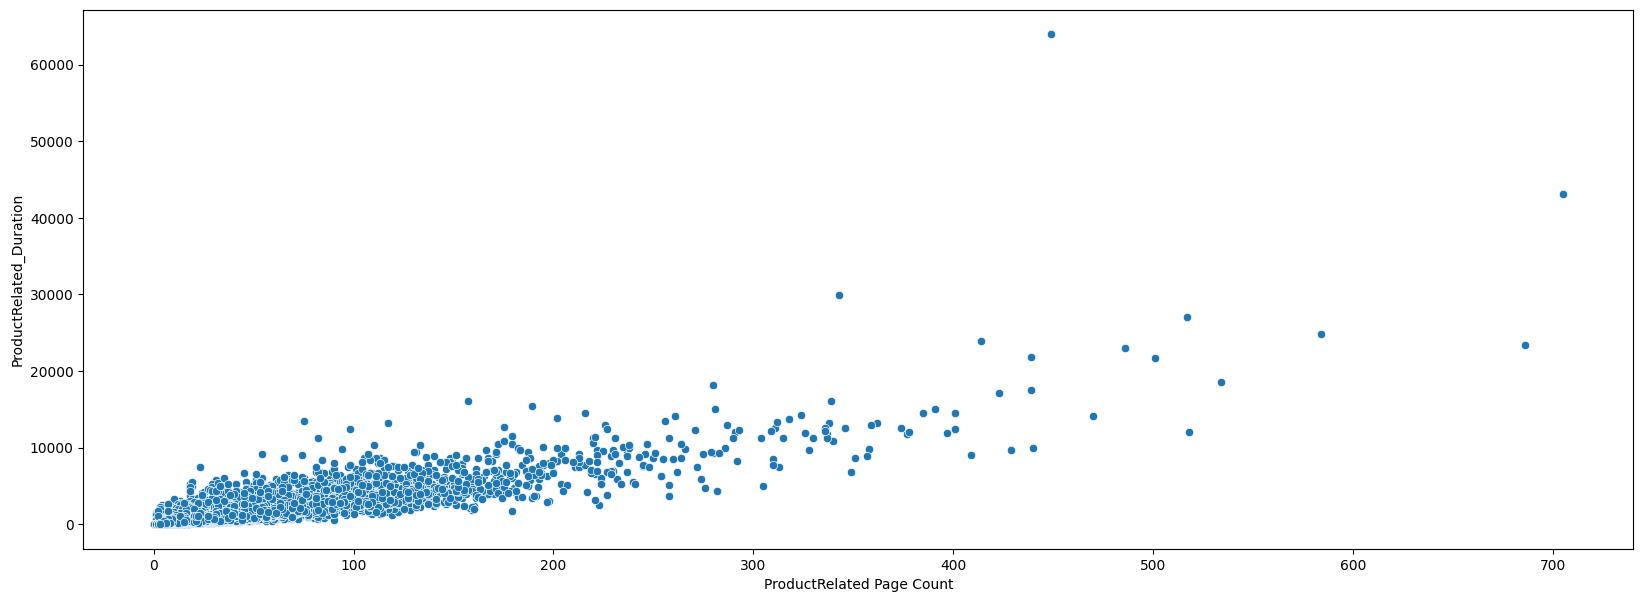

In [19]:
# 5️⃣ ProductRelated Pages
plt.figure(figsize=(20, 7))
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', data=df)
plt.xlabel('ProductRelated Page Count')
plt.show()

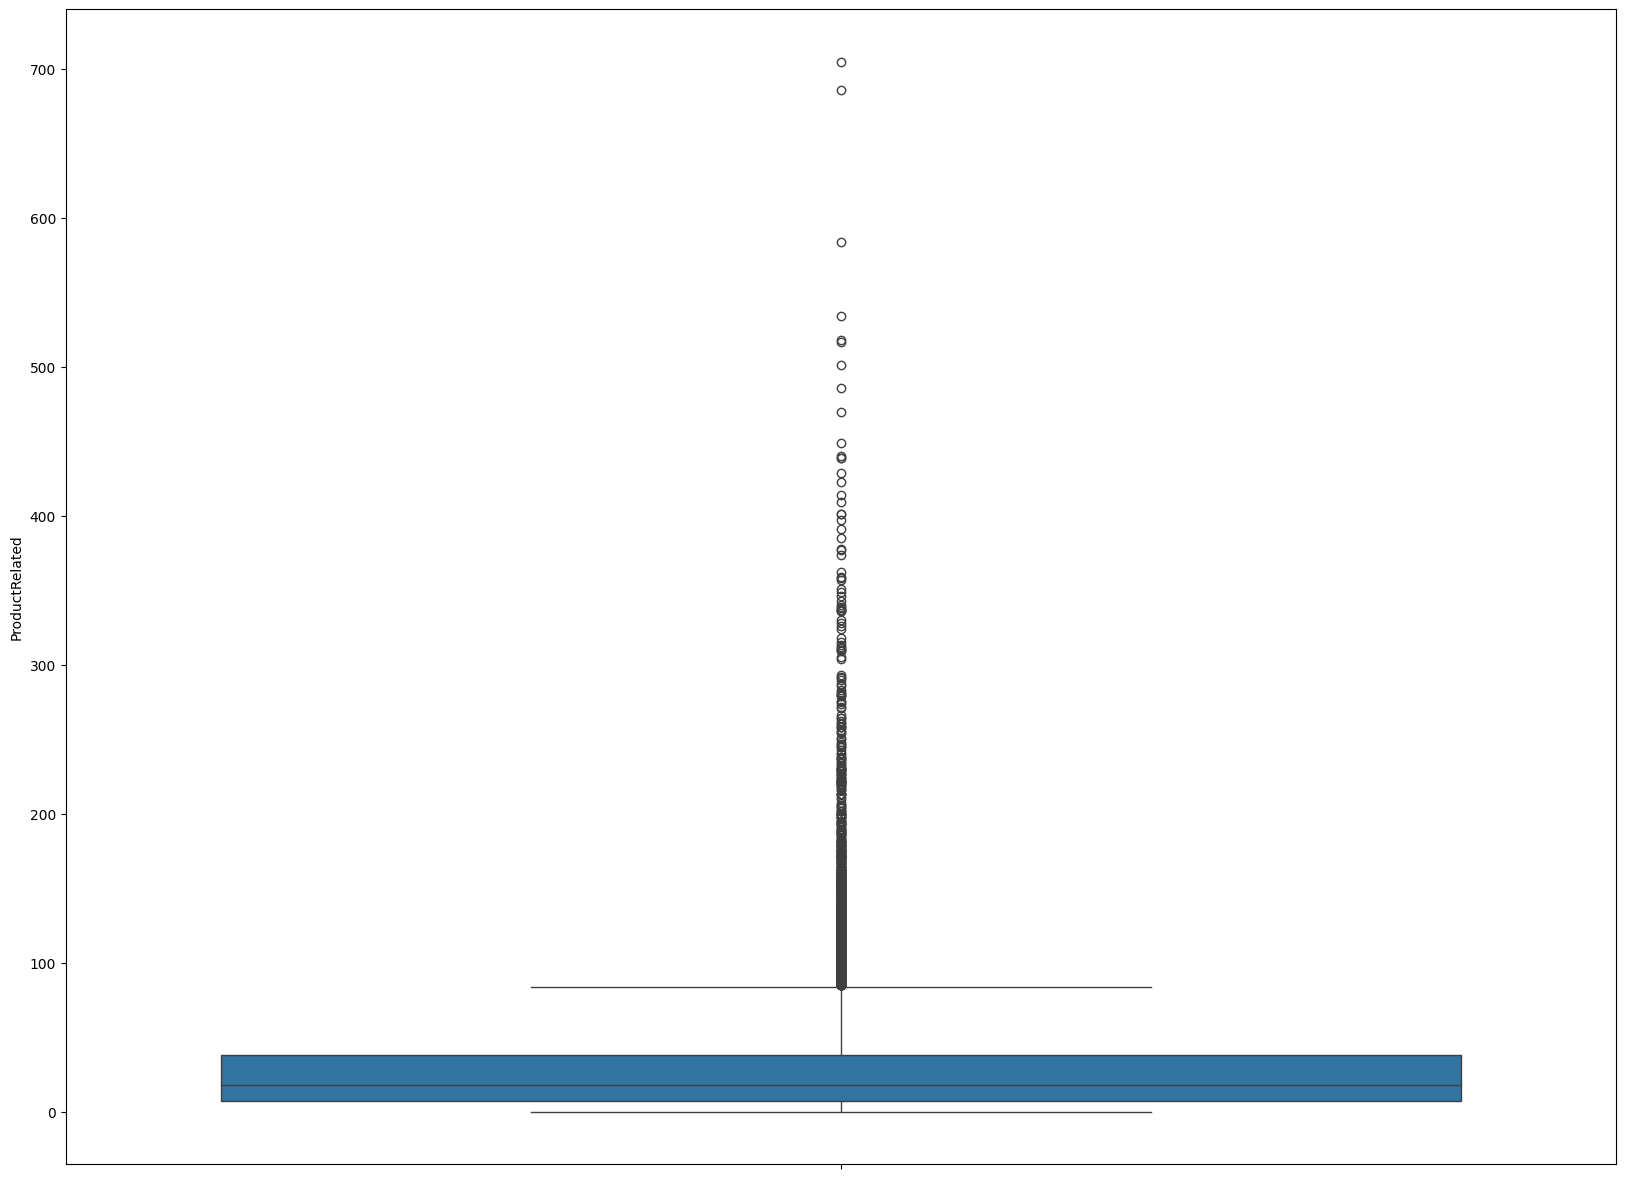

In [20]:
plt.figure(figsize=(20, 15))
sns.boxplot(y='ProductRelated', data=df)
plt.show()

/tmp/ipython-input-173628034.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='PageValues', x='Revenue', data=df, palette=colors)


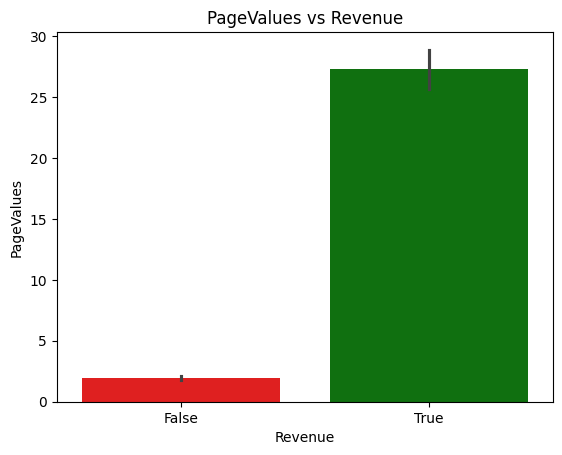

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color palette for string values
colors = {'True': 'green', 'False': 'red'}

# Plot
sns.barplot(y='PageValues', x='Revenue', data=df, palette=colors)
plt.title("PageValues vs Revenue")
plt.show()

In [25]:
# 7️⃣ Mean Time Spent Per Page Type
adm = np.mean((df['Administrative'] / df['Administrative_Duration']).replace(np.inf, np.nan).dropna())
inm = np.mean((df['Informational'] / df['Informational_Duration']).replace(np.inf, np.nan).dropna())
prm = np.mean((df['ProductRelated'] / df['ProductRelated_Duration']).replace(np.inf, np.nan).dropna())

avg_times = pd.Series([adm, inm, prm], index=['Administrative', 'Informational', 'ProductRelated'])

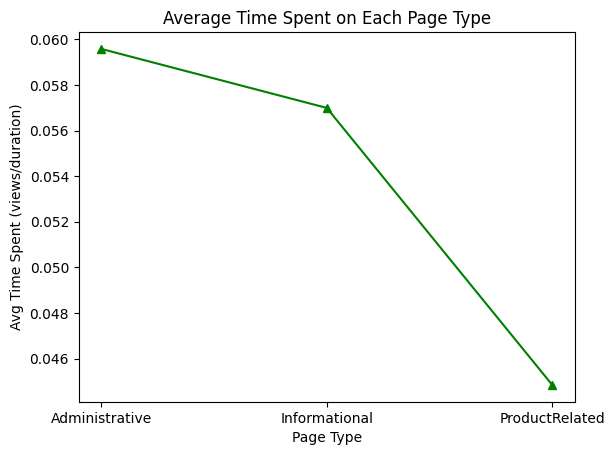

In [26]:
plt.plot(avg_times.index, avg_times.values, '-^g')
plt.xlabel('Page Type')
plt.ylabel('Avg Time Spent (views/duration)')
plt.title("Average Time Spent on Each Page Type")
plt.show()

In [27]:
# 8️⃣ Revenue by Operating System
os_counts = df.groupby('Revenue')['OperatingSystems'].value_counts()
os_true = os_counts[True]
os_df = pd.DataFrame({'OS': os_true.index.get_level_values(0), 'Count': os_true.values})

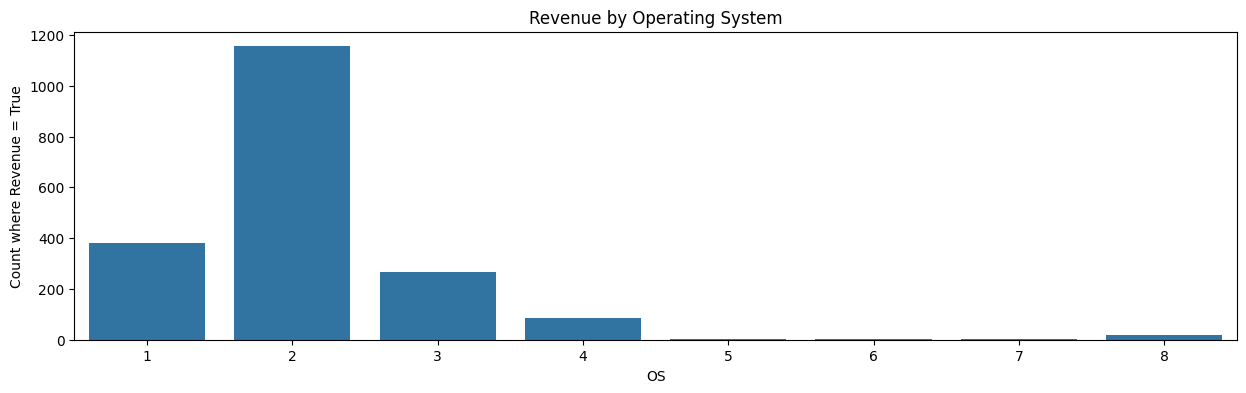

In [28]:
plt.figure(figsize=(15, 4))
sns.barplot(x='OS', y='Count', data=os_df)
plt.ylabel("Count where Revenue = True")
plt.title("Revenue by Operating System")
plt.show()

In [29]:
# 9️⃣ Revenue by Browser
browser_counts = df.groupby('Revenue')['Browser'].value_counts()
browser_true = pd.DataFrame(browser_counts[True])

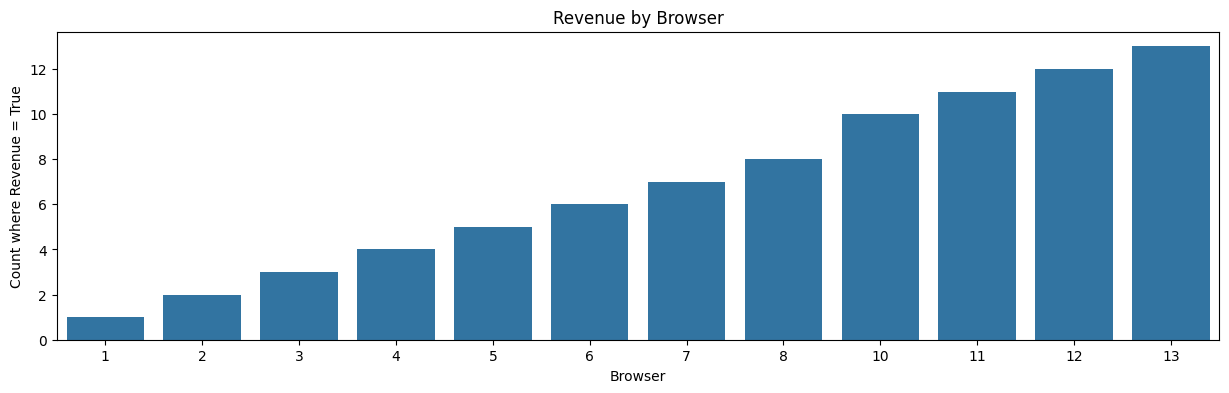

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(x=browser_true.index.get_level_values(0), y='Browser', data=browser_true)
plt.ylabel("Count where Revenue = True")
plt.title("Revenue by Browser")
plt.show()

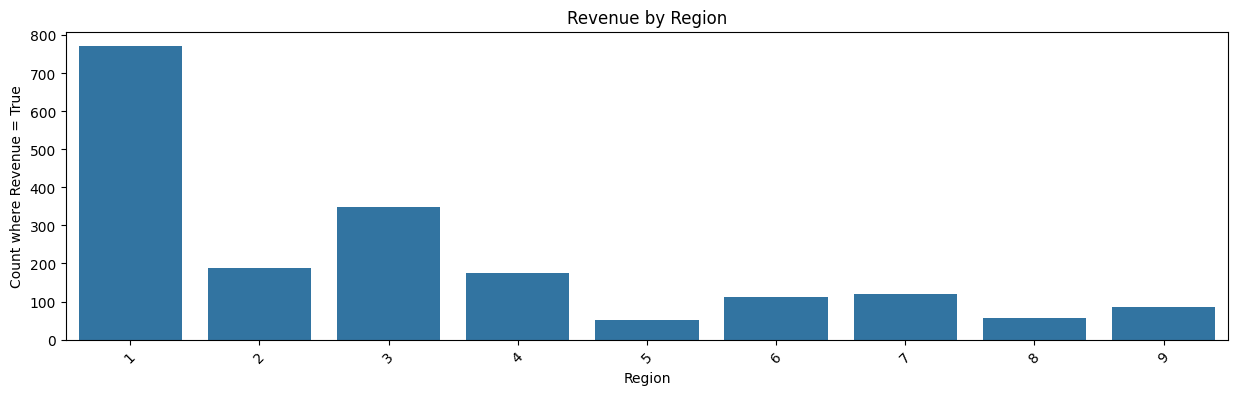

In [36]:
# Step 1: Group by Revenue and Region, then count
region_counts = df.groupby(['Revenue', 'Region']).size().unstack(fill_value=0)

# Step 2: Separate True and False rows
region_true = region_counts.loc[True]
region_false = region_counts.loc[False]

# Step 3: Plot bar chart for True
plt.figure(figsize=(15, 4))
sns.barplot(x=region_true.index, y=region_true.values)
plt.ylabel("Count where Revenue = True")
plt.title("Revenue by Region")
plt.xticks(rotation=45)
plt.show()

# Step 4: Compute ratio (True / False) per region
region_ratio = region_true / region_false
region_ratio = region_ratio.sort_values()

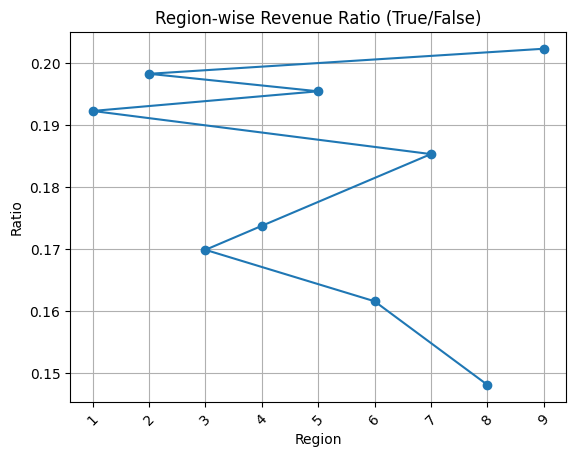

In [37]:
# Step 5: Plot ratio
region_ratio.plot(kind='line', marker='o')
plt.title("Region-wise Revenue Ratio (True/False)")
plt.xlabel("Region")
plt.ylabel("Ratio")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

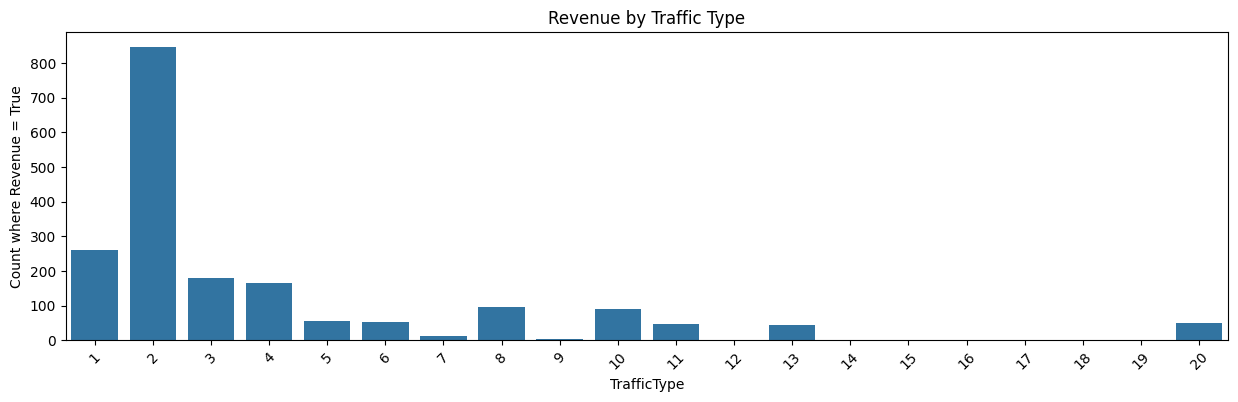

In [39]:
# Step 1: Group by Revenue and TrafficType, count values
traffic_counts = df.groupby(['Revenue', 'TrafficType']).size().unstack(fill_value=0)

# Step 2: Separate True and False
traffic_true = traffic_counts.loc[True]
traffic_false = traffic_counts.loc[False]

# Step 3: Barplot of Revenue=True by TrafficType
plt.figure(figsize=(15, 4))
sns.barplot(x=traffic_true.index, y=traffic_true.values)
plt.ylabel("Count where Revenue = True")
plt.xlabel("TrafficType")
plt.title("Revenue by Traffic Type")
plt.xticks(rotation=45)
plt.show()

# Step 4: Ratio plot (only where both counts > 50)
mask = (traffic_true > 50) & (traffic_false > 50)
traffic_ratio = (traffic_true[mask] / traffic_false[mask]).sort_values()

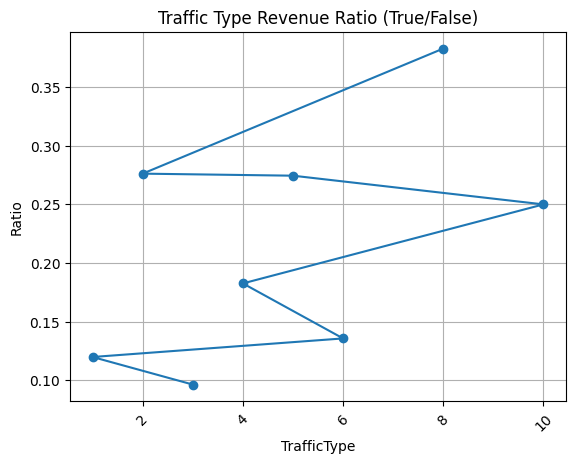

In [40]:
# Step 5: Plot ratio
traffic_ratio.plot(kind='line', marker='o')
plt.title("Traffic Type Revenue Ratio (True/False)")
plt.xlabel("TrafficType")
plt.ylabel("Ratio")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv(r"/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/online_shoppers_intention.csv")
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10080,2,41.500000,1,57.5,19,2689.625000,0.000000,0.024242,0.000000,0.0,Dec,2,2,3,2,Returning_Visitor,False,False
11502,0,0.000000,0,0.0,7,178.250000,0.028571,0.057143,0.000000,0.0,Dec,2,10,6,3,Returning_Visitor,False,False
12139,7,172.059524,0,0.0,104,5155.351132,0.006893,0.031571,8.805139,0.0,Nov,2,5,1,1,Returning_Visitor,False,False
2528,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,1,1,3,3,New_Visitor,False,False
2583,0,0.000000,0,0.0,9,464.000000,0.000000,0.022222,29.315556,0.0,May,2,2,1,2,Returning_Visitor,False,True
10237,0,0.000000,0,0.0,17,559.750000,0.011765,0.019608,0.000000,0.0,Nov,1,1,3,3,Returning_Visitor,False,False
5633,6,63.683333,0,0.0,8,129.761111,0.017857,0.068924,0.000000,0.0,June,3,2,3,3,Returning_Visitor,False,False
8810,0,0.000000,0,0.0,4,75.500000,0.000000,0.050000,0.000000,0.0,Nov,2,2,1,8,New_Visitor,False,False
8823,0,0.000000,0,0.0,4,53.625000,0.000000,0.050000,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,False,False
141,0,0.000000,0,0.0,9,272.500000,0.000000,0.011852,0.000000,0.2,Feb,1,1,6,3,Returning_Visitor,False,False


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Convert to lowercase (to match keys) and map
df['Month'] = df['Month'].str.lower().map(month_map)

# Preview result
print(df[['Month']])

       Month
0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
...      ...
12325   12.0
12326   11.0
12327   11.0
12328   11.0
12329   11.0

[12330 rows x 1 columns]


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12.0,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11.0,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11.0,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11.0,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11.0,3,2,1,2,New_Visitor,True,False


In [ ]:
# 1. Basic inspection
print(df.shape)

(12330, 18)


In [ ]:
# Define the mapping
visitor_map = {
    'Returning_Visitor': 2,
    'New_Visitor': 1,
    'Other': 3
}

# Apply the mapping
df['VisitorType'] = df['VisitorType'].map(visitor_map)

# Verify the result
print(df['VisitorType'].value_counts())


VisitorType
2    10551
1     1694
3       85
Name: count, dtype: int64


In [ ]:
# Convert True/False to 1/0 in Weekend and Revenue columns
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Check the result
print(df[['Weekend', 'Revenue']].head())


   Weekend  Revenue
0        0        0
1        0        0
2        0        0
3        0        0
4        1        0


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,2,1,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)